In [1]:
import os,subprocess,glob,sys
from PIL import Image
from math import exp,pi,sin,cos
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import tensorflow as tf
#内部コマンドは先頭に「!」を付けるとよい、例：「!ls」

'''
#RAMの確認
print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for vars in dir():
    if vars.startswith("_") == 0:
        print("{}{: >25}{}{: >10}{}".format('|',vars,'|',sys.getsizeof(eval(vars)),'|'))
#vRAMの確認
!nvidia-smi.exe
'''

'\n#RAMの確認\nprint("{}{: >25}{}{: >10}{}".format(\'|\',\'Variable Name\',\'|\',\'Memory\',\'|\'))\nprint(" ------------------------------------ ")\nfor vars in dir():\n    if vars.startswith("_") == 0:\n        print("{}{: >25}{}{: >10}{}".format(\'|\',vars,\'|\',sys.getsizeof(eval(vars)),\'|\'))\n#vRAMの確認\n!nvidia-smi.exe\n'

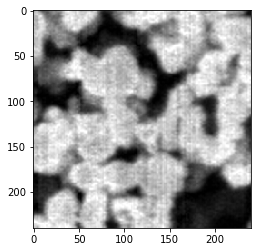

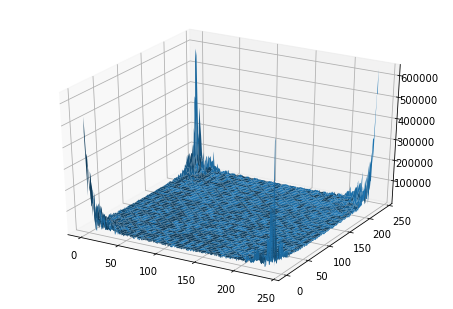

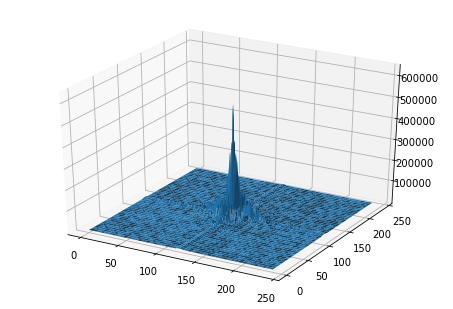

In [2]:
img = np.array(Image.open('/Users/shgtkmt/workspace/fourier_learning/train/0_0.tif'),'float64')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,255))
img = scaler.fit_transform(img)
plt.imshow(img, cmap='gray')
plt.show()
'''Imageオブジェクトに戻す
img2 = Image.fromarray(img)
print(img2.size)
'''
'''２次元表示例
x = np.linspace(0, 2*pi, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()
'''
cir_ave = 0
for i in range(239):
    cir_ave += img[0,i]
    cir_ave += img[i,-1]
    cir_ave += img[-1,-i]
    cir_ave += img[-i,0]
cir_ave /= 956
img -= cir_ave
for i in range(239):
    for j in range(12):
        img[j,i] = img[j,i]*sin((2*pi*j)/12)
        img[i,-j] = img[i,-j]*sin((2*pi*j)/12)
        img[-j,-i] = img[-j,-i]*sin((2*pi*j)/12)
        img[-i,j] = img[-i,j]*sin((2*pi*j)/12)
with open('./demo/demo.txt','w') as f:
    for y in range(240):
        for x in range(240):
            f.write(str(img[y,x]) + ' ')
        f.write('\n')
        
img = np.fft.fft2(img)
x = np.arange(0,240,1) #下と同じ
y = np.linspace(0, 240, 240) #上と同じ
_x, _y = np.meshgrid(x,y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(_x,_y,np.absolute(img))
plt.show()

img = np.fft.fftshift(img)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(_x,_y,np.absolute(img))
plt.show()

#Image.fromarray(np.uint8(img)).save('./demo/img.tif')

In [2]:
tiff_path = '/home/tokuo/workspace/cnn_fourier/train/0_0.tif'

def poo(local_f,x,y):
    arr = local_f
    cir_ave = 0
    num = 0
    if x < 8:
        empty_range_x = 8 - x
    else:
        empty_range_x = False
    if 248-1 < x+15:
        empty_range_x2 = (x+16) - 248
    else:
        empty_range_x2 = False
    flag_x = not(empty_range_x or empty_range_x2) #x方向での0パディング領域が存在しない == true
    if y < 8:
        empty_range_y = 8 - y
    else:
        empty_range_y = False
    if 248-1 < y+15:
        empty_range_y2 = (y+16) - 248
    else:
        empty_range_y2 = False
    flag_y = not(empty_range_y or empty_range_y2) #y方向での0パディング領域が存在しない == true
    if (flag_x and flag_y): #０パディング領域が存在しない場合
        for k in range(15):
            cir_ave += arr[0,k]
            cir_ave += arr[k,-1]
            cir_ave += arr[-1,-k]
            cir_ave += arr[-k,0]
        num = 60
        cir_ave /= num
        arr -= cir_ave
    elif (not(flag_x) and flag_y): #x方向のみに０パディング領域が存在する場合
        if (empty_range_x): #左側が０パディング
            for k in range(16 - empty_range_x):
                cir_ave += arr[0,k+empty_range_x]
                num += 1
                cir_ave += arr[-1,k+empty_range_x]
                num += 1
            for k in range(14):
                cir_ave += arr[1+k, empty_range_x]
                num += 1
                cir_ave += arr[1+k, -1]
                num += 1
            cir_ave /= num
            arr[:, empty_range_x:] -= cir_ave
        else: #右側が０パディング
            for k in range(16 - empty_range_x2):
                cir_ave += arr[0,k]
                num += 1
                cir_ave += arr[-1,k]
                num += 1
            for k in range(14):
                cir_ave += arr[1+k, 0]
                num += 1
                cir_ave += arr[1+k, -empty_range_x2]
                num += 1
            cir_ave /= num
            arr[:, :-empty_range_x2] -= cir_ave
    elif (flag_x and not(flag_y)): #y方向のみに０パディング領域が存在する場合
        if (empty_range_y): #上側が０パディング
            for k in range(16 - empty_range_y):
                cir_ave += arr[k+empty_range_y, 0]
                num += 1
                cir_ave += arr[k+empty_range_y, -1]
                num += 1
            for k in range(14):
                cir_ave += arr[empty_range_y, 1+k]
                num += 1
                cir_ave += arr[-1, 1+k]
                num += 1
            cir_ave /= num
            arr[empty_range_y:, :] -= cir_ave
        else: #下側が０パディング
            for k in range(16 - empty_range_y2):
                cir_ave += arr[k,0]
                num += 1
                cir_ave += arr[k,-1]
                num += 1
            for k in range(14):
                cir_ave += arr[0, 1+k]
                num += 1
                cir_ave += arr[-empty_range_y2, 1+k]
                num += 1
            cir_ave /= num
            arr[:-empty_range_y2, :] -= cir_ave
    else: #x、y方向ともに０パディング領域が存在する場合
        if(empty_range_x):#左側が０パディング領域
            if(empty_range_y):#左上側が０パディング領域
                for k in range(16 - empty_range_x):
                    cir_ave += arr[empty_range_y, k+empty_range_x]
                    num += 1
                    cir_ave += arr[-1, k+empty_range_x]
                    num += 1
                for k in range(14 - empty_range_y):
                    cir_ave += arr[k+empty_range_y+1, empty_range_x]
                    num += 1
                    cir_ave += arr[k+empty_range_y+1, -1]
                    num += 1
                cir_ave /= num
                arr[empty_range_y:, empty_range_x:] -= cir_ave
            else:#左下側が０パディング領域
                for k in range(16 - empty_range_x):
                    cir_ave += arr[0, k+empty_range_x]
                    num += 1
                    cir_ave += arr[-empty_range_y2, k+empty_range_x]
                    num += 1
                for k in range(14 - empty_range_y2):
                    cir_ave += arr[k, empty_range_x]
                    num += 1
                    cir_ave += arr[k, -1]
                    num += 1
                cir_ave /= num
                arr[:-empty_range_y2, empty_range_x:] -= cir_ave
        else:#右側が０パディング領域
            if(empty_range_y2):#右下が０パディング領域
                for k in range(16 - empty_range_x2):
                    cir_ave += arr[0, k]
                    num += 1
                    cir_ave += arr[-empty_range_y2, k]
                    num += 1
                for k in range(14 - empty_range_y2):
                    cir_ave += arr[k+1, 0]
                    num += 1
                    cir_ave += arr[k+1, -empty_range_x2]
                    num += 1
                cir_ave /= num
                arr[:-empty_range_y2, :-empty_range_x2] -= cir_ave
            else:#右上が０パディング領域
                for k in range(16 - empty_range_x2):
                    cir_ave += arr[empty_range_y, k]
                    num += 1
                    cir_ave += arr[-1, k]
                    num += 1
                for k in range(14 - empty_range_y):
                    cir_ave += arr[k+1+empty_range_y, 0]
                    num += 1
                    cir_ave += arr[k+1+empty_range_y, -empty_range_x2]
                    num += 1
                cir_ave /= num
                arr[empty_range_y:, :-empty_range_x2] -= cir_ave
    return arr

def myfourier(tiff_path):
    pre_img =  np.array(Image.open(tiff_path))
    _x = len(pre_img[1])
    _y = len(pre_img[0])
    X = np.zeros([1, _y, _x, 5],'float32')
    X[0,:,:,0] = pre_img
    img = np.zeros([_y+16, _x+16])
    img[8:-8, 8:-8] = pre_img
    local_f = np.zeros([16,16])
    cir_ave = 0
    for y in range(_y):
        for x in range(_x):
            local_f = img[y:y+16, x:x+16]
            '''
            for k in range(15):
                cir_ave += local_f[0,k]
                cir_ave += local_f[k,-1]
                cir_ave += local_f[-1,-k]
                cir_ave += local_f[-k,0]
            cir_ave /= 60
            local_f -= cir_ave
            '''
            #local_f = poo(local_f,x,y)
            local_f = np.fft.fft2(local_f)
            local_f = np.fft.fftshift(local_f)
            X[0,y,x,4] = local_f.sum()#256
            X[0,y,x,3] = local_f[4:12, 4:12].sum()#64
            X[0,y,x,4] = (X[0,y,x,4] - X[0,y,x,3])
            X[0,y,x,2] = local_f[6:10, 6:10].sum()#16
            X[0,y,x,3] = (X[0,y,x,3] - X[0,y,x,2])
            X[0,y,x,1] = local_f[7:9, 7:9].sum()#4
            X[0,y,x,2] = (X[0,y,x,2] - X[0,y,x,1])
            X[0,y,x,1] = np.absolute(X[0,y,x,1]/4)
            X[0,y,x,2] = np.absolute(X[0,y,x,2]/12)
            X[0,y,x,3] = np.absolute(X[0,y,x,3]/48)
            X[0,y,x,4] = np.absolute(X[0,y,x,4]/192)
    return X
    
#X = myfourier(tiff_path)

mask_path = '/home/tokuo/workspace/cnn_fourier/train_ans/0_0_mask.tif'

'''
def mask_check(mask_path):
    mask = Image.open(mask_path)
    _x = int(mask.size[0])
    _y = int(mask.size[1])
    Y = np.zeros([1, _y*_x])
    mask = np.array(mask)
    for y in range(_y):
        for x in range(_x):
            if(mask[y,x]):
                Y[0,_x*y+x] = 1
    return Y
'''

def mask_check(mask_path):
    mask = Image.open(mask_path)
    _x = int(mask.size[0]/4)
    _y = int(mask.size[1]/4)
    Y = np.zeros([1, _y*_x])
    mask = np.array(mask.resize((_x,_y)))
    for y in range(_y):
        for x in range(_x):
            if(mask[y,x]):
                Y[0,_x*y+x] = 1
    return Y

#Y = mask_check(mask_path)

In [3]:
train_path = glob.glob("/Users/shgtkmt/workspace/cnn_fourier/train//*.tif")
data_num = (len(train_path) - 1) - 26
X = myfourier(train_path[data_num])
for i in range(data_num):
    X = np.append(X,myfourier(train_path[i]),axis=0)
    
test_path = glob.glob("/Users/shgtkmt/workspace/cnn_fourier/train//*.tif")
data_num = len(test_path)-1
Xte = myfourier(test_path[data_num])
for i in range(data_num - 150):
    Xte = np.append(Xte,myfourier(test_path[i + 150]),axis=0)
    
print(X.shape,Xte.shape)

C:\Users\shgtkmt\Anaconda3\envs\deep-learning\lib\site-packages\ipykernel_launcher.py:170: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\shgtkmt\Anaconda3\envs\deep-learning\lib\site-packages\ipykernel_launcher.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\shgtkmt\Anaconda3\envs\deep-learning\lib\site-packages\ipykernel_launcher.py:173: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\shgtkmt\Anaconda3\envs\deep-learning\lib\site-packages\ipykernel_launcher.py:175: ComplexWarning: Casting complex values to real discards the imaginary part


(150, 240, 240, 5) (26, 240, 240, 5)


In [3]:
train_ans_path = glob.glob("/Users/shgtkmt/workspace/cnn_fourier/train_ans//*.tif")
test_ans_path = glob.glob("/Users/shgtkmt/workspace/cnn_fourier/train_ans//*.tif")

data_num = (len(train_ans_path) - 1) - 26
Y = mask_check(train_ans_path[data_num])
for i in range(data_num):
    Y = np.append(Y,mask_check(train_ans_path[i]),axis=0)

data_num = len(test_ans_path)-1
Yte = mask_check(test_ans_path[data_num])
for i in range(data_num - 150):
    Yte = np.append(Yte,mask_check(test_ans_path[i + 150]),axis=0)

print(data_num+1,Y.shape,Yte.shape)

176 (150, 3600) (26, 3600)


In [4]:
'''
with open("./../X.txt", "w") as f:
    for num in range(X.shape[0]):
        f.write('flag0\n')
        for row in range(X.shape[1]):
            f.write('flag1\n')
            for column in range(X.shape[2]):
                f.write('flag2\n')
                for ch in range(X.shape[3]):
                    f.write(str(X[num,row,column,ch]))
                    f.write('\n')
                    
with open("./../Xte.txt", "w") as f:
    for num in range(Xte.shape[0]):
        f.write('flag0\n')
        for row in range(Xte.shape[1]):
            f.write('flag1\n')
            for column in range(Xte.shape[2]):
                f.write('flag2\n')
                for ch in range(Xte.shape[3]):
                    f.write(str(Xte[num,row,column,ch]))
                    f.write('\n')

'''
#'''
X = np.zeros([150,240,240,5],'float32')
with open("./../X.txt", "r") as f:
    num=-1
    row=-1
    column=-1
    ch=0
    for line in f:
        if (line.find('flag0') == 0):
            num += 1
            row = -1
        elif (line.find('flag1') == 0):
            row += 1
            column = -1
        elif (line.find('flag2') == 0):
            column += 1
            ch = 0
        else:
            X[num,row,column,ch] = float(line)
            ch += 1
        
Xte = np.zeros([26,240,240,5],'float32')
with open("./../Xte.txt", "r") as f:
    num=-1
    row=-1
    column=-1
    ch=0
    for line in f:
        if (line.find('flag0') == 0):
            num += 1
            row = -1
        elif (line.find('flag1') == 0):
            row += 1
            column = -1
        elif (line.find('flag2') == 0):
            column += 1
            ch = 0
        else:
            Xte[num,row,column,ch] = float(line)
            ch += 1
#'''

In [5]:
from keras.models import Sequential

Using CNTK backend


In [6]:
model = Sequential()
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

#メモリやばい
model.add(Conv2D(10, (3, 3), padding='same', input_shape=(240, 240, 5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(20, (3, 3), padding='same',))#strides
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#upsampling
'''
model.add(Conv2D(30, (4, 4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(UpSampling2D((4, 4)))
model.add(Conv2D(10, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(UpSampling2D((3, 3)))
'''

model.add(Conv2D(1, (3, 3), padding='same'))
model.add(Flatten())
#model.add(Dense(5000))
#model.add(LeakyReLU(0.2))
#model.add(Dropout(0.3))
model.add(Dense(60*60))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", 
              optimizer='adam',
             metrics=['accuracy'])

In [7]:
model.fit(X, Y, epochs=15, batch_size=10)
#for i in range(15):
#    model.train_on_batch(X[i*10:i*10+10, :], Y[i*10:i*10+10, :], )

Epoch 1/15


C:\Users\shgtkmt\Anaconda3\envs\deep-learning\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input543") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


150/150 [==============================] - 8s - loss: 0.7398 - acc: 0.5289     
Epoch 2/15
150/150 [==============================] - 1s - loss: 0.5971 - acc: 0.6818     
Epoch 3/15
150/150 [==============================] - 1s - loss: 0.4659 - acc: 0.7878     
Epoch 4/15
150/150 [==============================] - 1s - loss: 0.3281 - acc: 0.8634     
Epoch 5/15
150/150 [==============================] - 1s - loss: 0.2103 - acc: 0.9268     
Epoch 6/15
150/150 [==============================] - 1s - loss: 0.1119 - acc: 0.9747     
Epoch 7/15
150/150 [==============================] - 1s - loss: 0.0509 - acc: 0.9950     
Epoch 8/15
150/150 [==============================] - 1s - loss: 0.0234 - acc: 0.9992     
Epoch 9/15
150/150 [==============================] - 1s - loss: 0.0117 - acc: 0.9999     
Epoch 10/15
150/150 [==============================] - 1s - loss: 0.0073 - acc: 1.0000     
Epoch 11/15
150/150 [==============================] - 1s - loss: 0.0047 - acc: 1.0000     
Epoch 12

In [8]:
loss_and_metrics = model.evaluate(Xte,Yte)
print("\nloss:{} accuracy:{}".format(loss_and_metrics[0],loss_and_metrics[1]))
print(model.summary())
#model.save_weights('./demo/wights.h5')
#print(model.layers[4].get_config())

26/26 [==============================] - 0s

loss:1.3452324867248535 accuracy:0.6749572157859802
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 240, 240, 10)      460       
_________________________________________________________________
batch_normalization_1 (Batch (None, 240, 240, 10)      40        
_________________________________________________________________
activation_1 (Activation)    (None, 240, 240, 10)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 80, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 20)        1820      
_________________________________________________________________
batch_normalization_2 (Batch (None, 80, 80, 20)        80        
_____________________________________________

C:\Users\shgtkmt\Anaconda3\envs\deep-learning\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input543") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


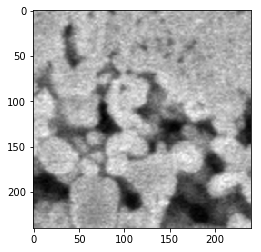

26/26 [==============================] - 0s


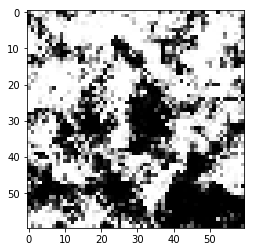

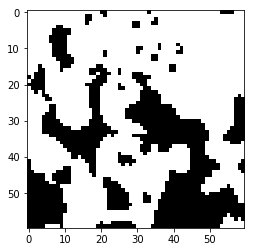

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,255))
plt.imshow(Xte[10,:,:,0], cmap='gray')
plt.show()
ans = model.predict_proba(Xte)
img = np.reshape(ans[10,:],(60,60))
img = scaler.fit_transform(img)
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(np.reshape(Yte[10,:],(60,60)), cmap='gray')
plt.show()